IMPORT MODULES

In [11]:
# we use pandas for data manipulation and analysis
import pandas as pd
# we use numpy for numerical computations and data manipulation tasks.
import numpy as np
# we use matplotlib for data visualization
import matplotlib.pyplot as plt
# we use seaborn for making statistical graphics
import seaborn as sns
# sklearn is used to implement machine learning models and statistical modelling
from sklearn.model_selection import train_test_split
#standscaler is used to stabdarduze the data values into a standard format
from sklearn.preprocessing import StandardScaler
#linear regression is used to predict the value of variable based on the value of another variable
from sklearn.linear_model import LinearRegression
#mean_squared_error, r2_score is used to evaluate the performance of machine learning models, especially regression models.
from sklearn.metrics import mean_squared_error, r2_score


LOADING DATASET

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Lenovo\Downloads\Admission_Predict.csv')
data


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
# It displays the first five rows of the dataframe by default
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#it print the summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance_of_Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [33]:
data.drop('Serial No.', axis=1, inplace=True)

In [34]:
data.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


In [35]:
# It is used to generate descriptive statistics of the data
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [36]:

print(data.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit '],
      dtype='object')


To check whether there are any missing values in the dataset

In [37]:
# to find missing values
print('Missing values in columns')
data.isnull().sum()

Missing values in columns


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

EXPLORATORY DATA ANALYSIS:
 We were using Exploratory Data Analysis (EDA) because it helps us understand our data better. By visualizing and analyzing the information, we can find patterns, identify errors, and gain valuable insights. It guides us in making informed decisions, selecting appropriate analysis methods, and forming hypotheses. 


HISTOGRAM OF NUMERIC VARAIABLES

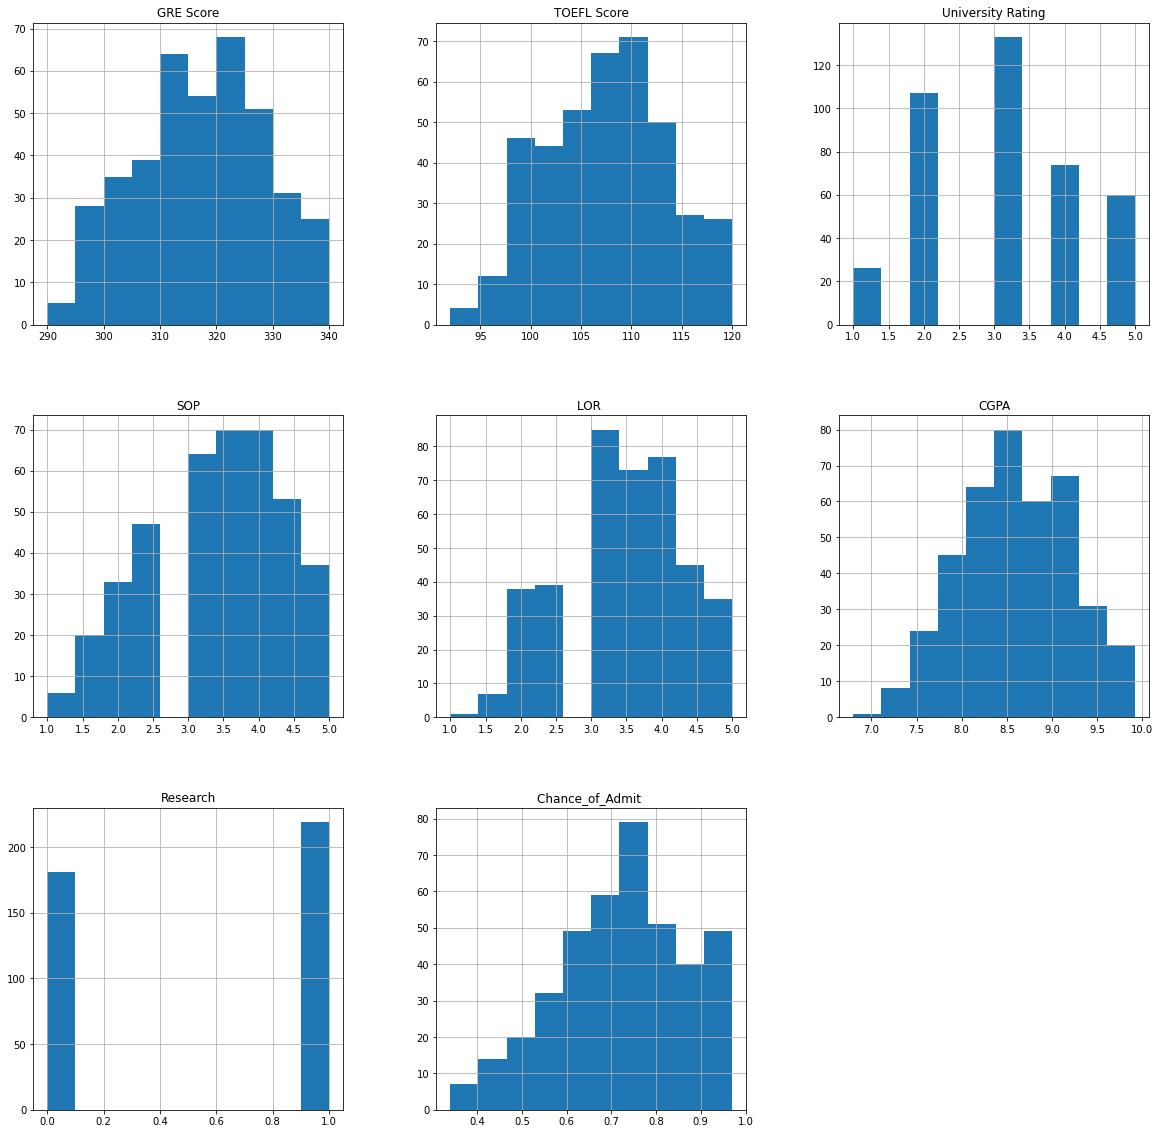

In [38]:
data.hist(figsize=(20,20))
plt.show()

The above histograms for all independent variable shows that how datas are distributed.

CORRELATION ANALYSIS

Here correlation analysis is used to understand the relationships between the different features (independent variables) and the target variable (admission chance).The correlation analysis will help us identify which features have a strong positive or negative correlation with the target variable, which can provide insights into feature importance and potential predictors for admission chance.

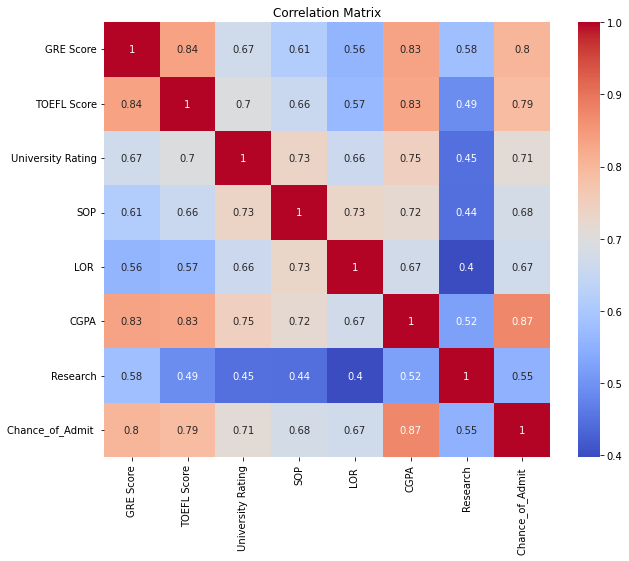

In [41]:
correlation = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The heatmap visualizes the relationships between different numerical features in the dataset. Each cell in the heatmap represents the correlation coefficient between two features, and the color of the cell indicates the strength and direction of the correlation. Brighter colors (e.g., red) represent positive correlations, while darker colors (e.g., blue) represent negative correlations. The diagonal line in the heatmap represents the correlation of each feature with itself, which is always 1. By examining the heatmap, we can quickly identify which features are positively or negatively correlated and understand how strongly the features are related to each other.

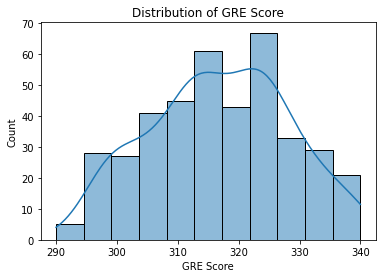

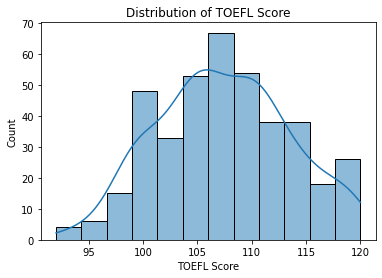

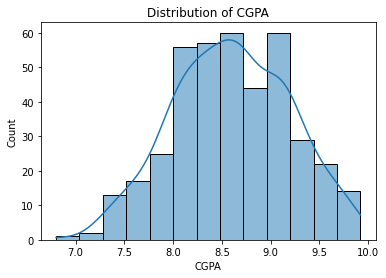

In [14]:
numeric_features = ["GRE Score", "TOEFL Score", "CGPA"]
for feature in numeric_features:
    plt.figure()
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

The histograms show us how the scores for "GRE Score," "TOEFL Score," and "CGPA" are distributed among the applicants.

For "GRE Score" and "TOEFL Score," most applicants have scores around the middle, with only a few having very high or very low scores.
The "CGPA" scores also have a peak around a certain value, and most applicants have CGPA scores close to that value, but there is more variability in the CGPA scores compared to the other two.

The scatter plot simply plots individual data points on the Cartesian plane, where the x-axis represents the "GRE Score" and the y-axis represents the "Chance of Admission". Each data point corresponds to an applicant's "GRE Score" and "Chance of Admission" value. The scatter plot shows the raw data without any fitting of a regression line.

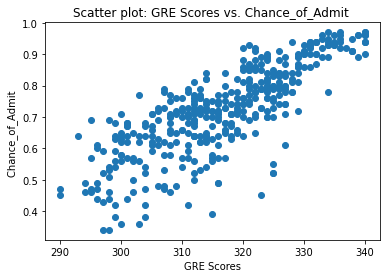

In [27]:
plt.scatter(data["GRE Score"], data["Chance_of_Admit "])
plt.xlabel("GRE Scores")
plt.ylabel("Chance_of_Admit ")
plt.title("Scatter plot: GRE Scores vs. Chance_of_Admit ")
plt.show()

From the above graph we are trying to establish a relationship between the GRE score and the chance of admit. The graph expalins how the chance of admit depends on the GRE score we can see it has a linear trend as the GRE score increases, the chance of admit will also increase they are positively correlated so it will give the correlation also.

The regression plot provides a visual representation of the estimated linear relationship between the two variables, while the scatter plot only shows the raw data points without any fitted line.


<AxesSubplot: xlabel='TOEFL Score', ylabel='Chance_of_Admit '>

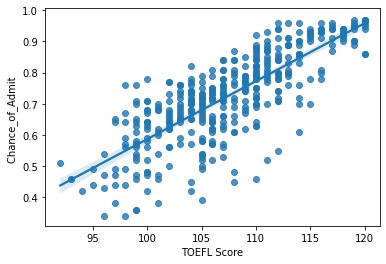

In [30]:
sns.regplot(x="TOEFL Score",y="Chance_of_Admit ",data=data)

A positive slope of the regression line suggests that as the "TOEFL Score" increases, the "Chance of Admission" tends to increase as well.This plot helps us understand if there is a correlation between a higher TOEFL score and a higher chance of getting admitted.As plot shows positive trend, and if it keep on increasing there will be the higher chances of getting admit.

<AxesSubplot: xlabel='GRE Score', ylabel='Chance_of_Admit '>

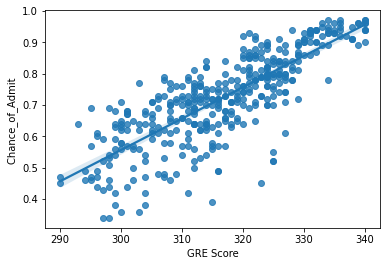

In [31]:
sns.regplot(x="GRE Score",y="Chance_of_Admit ",data=data)

A positive slope of the regression line suggests that as the "GRE Score" increases, the "Chance of Admission" tends to increase as well.This plot helps us understand if there is a correlation between a higher GRE score and a higher chance of getting admitted. As plot shows positive trend, and if it keep on increasing there will be the higher chances of getting admit.

In [16]:
# Select the relevant features for regression
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']]

# Select the target variable ('Admission Chance')
y = data['Chance_of_Admit ']


The above one tells that the data will be  separating the features and the target variable, making it ready for regression analysis, where the model will try to understand how these features influence the chances of admission.

TRAINING AND TESTING DATA

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The split is done in a way that 80% of the data is used for training the regression model, while the remaining 20% is kept for testing the model's performance. 

In [18]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


The above one shows that we are  standardizing the input features in the training and testing sets. Standardization is a preprocessing step that ensures all features have a mean of 0 and a standard deviation of 1. This process makes the features comparable and ensures that they do not dominate the model's training process due to differences in scale. 

LINEAR REGRESSION:
As our targeted variable is continous we use linear regression for our dataset.

In [19]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


We have used  linear model to predict the "Chance of Admission" based on the features in the testing set. The trained model can now be used to predict the admission chances of new applicants based on their GRE Score, TOEFL Score, University Rating, Statement of Purpose (SOP), Letter of Recommendation (LOR), and CGPA.

In [20]:
# Calculate the mean squared error and R-squared for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 0.004774749242806599
R-squared: 0.8150996090993061


A lower Mean Squared Error (MSE) indicates better model performance in terms of prediction accuracy.
A higher R-squared (R2) indicates that a larger proportion of the target variable's variance is explained by the model's independent variables, indicating a better fit.
Overall, an MSE of 0.00477 and an R-squared of 0.8151 are relatively good results for a linear regression model, indicating that the model is performing well in predicting the "Chance of Admission" based on the given features. However, always consider the specific context of the problem and the dataset while interpreting these metrics.
